# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587FA18 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587FA18issues.json

In [49]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [50]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587FA18issues.json')]

In [51]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [52]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

Author   State   closed_at  created_at  issue_number  \
0    AFA18SCM21V  closed  2018-11-17  2018-11-17           354   
1    SFA18SCM75J  closed  2018-11-17  2018-11-17           352   
2    AFA18SCM64A  closed  2018-11-17  2018-11-16           350   
3    BFA18SCM78Z  closed  2018-11-17  2018-11-16           348   
4    KFA18SCM64T  closed  2018-11-16  2018-11-16           347   
5    CFA18SCM71R  closed  2018-11-16  2018-11-16           345   
6    AFA18SCM57S  closed  2018-11-17  2018-11-16           343   
7         fazfar  closed  2018-11-16  2018-11-16           340   
8    PFA18SCM42I  closed  2018-11-16  2018-11-16           336   
9    PFA18SCM15B  closed  2018-11-16  2018-11-16           335   
10   KFA18SCM06Y  closed  2018-11-16  2018-11-16           334   
11   AFA18SCM85P  closed  2018-11-16  2018-11-16           333   
12   MFA18SCM37P  closed  2018-11-16  2018-11-16           329   
13   MFA18SCM28T  closed  2018-11-16  2018-11-16           327   
14   SFA18SCM56H  closed  2018-11-16  2018-11-16           328   
15   BFA18SCM86S  closed  2018-11-16  2018-11-16           326   
16   SFA18SCM30D    open        None  2018-11-16           324   
17   VFA18SCM66J  closed  2018-11-16  2018-11-16           323   
18   FFA18SCM76B  closed  2018-11-16  2018-11-16           321   
19   YFA18SCM09S  closed  2018-11-16  2018-11-16           318   
20       eosrory  closed  2018-11-16  2018-11-16           312   
21   PFA18SCM71G  closed  2018-11-16  2018-11-16           311   
22   SFA18SCM05R    open        None  2018-11-16           310   
23        jling3  closed  2018-11-16  2018-11-16           307   
24   AFA18SCM35C  closed  2018-11-16  2018-11-16           306   
25   NFA18SCM18B  closed  2018-11-16  2018-11-16           304   
26   AFA18SCM51S  closed  2018-11-16  2018-11-16           301   
27   SFA18SCM82S  closed  2018-11-16  2018-11-16           300   
28   GFA18SCM53S  closed  2018-11-16  2018-11-16           299   
29   AFA18SCM56B  closed  2018-11-16  2018-11-16           298   
..           ...     ...         ...         ...           ...   
165  AFA18SCM51S  closed  2018-11-13  2018-11-13            46   
166  PFA18SCM89C  closed  2018-11-13  2018-11-13            45   
167  RFA18SCM25S  closed  2018-11-15  2018-11-13            44   
168  NFA18SCM46J  closed  2018-11-13  2018-11-12            43   
169  PFA18SCM89C    open        None  2018-11-12            42   
170  AFA18SCM51S  closed  2018-11-12  2018-11-12            40   
171  AFA18SCM49V  closed  2018-11-13  2018-11-12            39   
172  SFA18SCM71C  closed  2018-11-12  2018-11-12            36   
173  KFA18SCM78L  closed  2018-11-12  2018-11-12            34   
174  MFA18SCM22N  closed  2018-11-14  2018-11-12            33   
175  RFA18SCM19G  closed  2018-11-14  2018-11-12            32   
176     DFA11111    open        None  2018-11-12            31   
177  NFA18SCM89J  closed  2018-11-13  2018-11-12            30   
178  AFA18SCM40P  closed  2018-11-12  2018-11-12            26   
179  RFA18SCM33P  closed  2018-11-12  2018-11-12            21   
180  SFA18SCM05P  closed  2018-11-12  2018-11-12            20   
181  SFA18SCM81V  closed  2018-11-12  2018-11-11            19   
182  AFA18SCM40P  closed  2018-11-12  2018-11-11            18   
183  RFA18SCM33P  closed  2018-11-14  2018-11-11            17   
184   SPM587FA18    open        None  2018-11-09            16   
185   SPM587FA18    open        None  2018-11-09            15   
186   SPM587FA18    open        None  2018-11-09            14   
187   SPM587FA18    open        None  2018-11-09            13   
188   SPM587FA18    open        None  2018-11-09            12   
189   SPM587FA18    open        None  2018-11-09            11   
190   SPM587FA18    open        None  2018-11-09            10   
191   SPM587FA18    open        None  2018-11-09             9   
192   SPM587FA18    open        None  2018-11-09             8   
193   SPM587FA18    open        None  2018-11-09  

In [53]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [54]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    AFA18SCM21V  closed  2018-11-17  2018-11-17           354   
1    SFA18SCM75J  closed  2018-11-17  2018-11-17           352   
2    AFA18SCM64A  closed  2018-11-17  2018-11-16           350   
3    BFA18SCM78Z  closed  2018-11-17  2018-11-16           348   
4    KFA18SCM64T  closed  2018-11-16  2018-11-16           347   
5    CFA18SCM71R  closed  2018-11-16  2018-11-16           345   
6    AFA18SCM57S  closed  2018-11-17  2018-11-16           343   
7         fazfar  closed  2018-11-16  2018-11-16           340   
8    PFA18SCM42I  closed  2018-11-16  2018-11-16           336   
9    PFA18SCM15B  closed  2018-11-16  2018-11-16           335   
10   KFA18SCM06Y  closed  2018-11-16  2018-11-16           334   
11   AFA18SCM85P  closed  2018-11-16  2018-11-16           333   
12   MFA18SCM37P  closed  2018-11-16  2018-11-16           329   
13   MFA18SCM28T  closed  2018-11-16  2018-11-16           327   
14   SFA18SCM56H  closed  2018-11-16  2018-11-16           328   
15   BFA18SCM86S  closed  2018-11-16  2018-11-16           326   
16   SFA18SCM30D    open        None  2018-11-16           324   
17   VFA18SCM66J  closed  2018-11-16  2018-11-16           323   
18   FFA18SCM76B  closed  2018-11-16  2018-11-16           321   
19   YFA18SCM09S  closed  2018-11-16  2018-11-16           318   
20       eosrory  closed  2018-11-16  2018-11-16           312   
21   PFA18SCM71G  closed  2018-11-16  2018-11-16           311   
22   SFA18SCM05R    open        None  2018-11-16           310   
23        jling3  closed  2018-11-16  2018-11-16           307   
24   AFA18SCM35C  closed  2018-11-16  2018-11-16           306   
25   NFA18SCM18B  closed  2018-11-16  2018-11-16           304   
26   AFA18SCM51S  closed  2018-11-16  2018-11-16           301   
27   SFA18SCM82S  closed  2018-11-16  2018-11-16           300   
28   GFA18SCM53S  closed  2018-11-16  2018-11-16           299   
29   AFA18SCM56B  closed  2018-11-16  2018-11-16           298   
..           ...     ...         ...         ...           ...   
165  AFA18SCM51S  closed  2018-11-13  2018-11-13            46   
166  PFA18SCM89C  closed  2018-11-13  2018-11-13            45   
167  RFA18SCM25S  closed  2018-11-15  2018-11-13            44   
168  NFA18SCM46J  closed  2018-11-13  2018-11-12            43   
169  PFA18SCM89C    open        None  2018-11-12            42   
170  AFA18SCM51S  closed  2018-11-12  2018-11-12            40   
171  AFA18SCM49V  closed  2018-11-13  2018-11-12            39   
172  SFA18SCM71C  closed  2018-11-12  2018-11-12            36   
173  KFA18SCM78L  closed  2018-11-12  2018-11-12            34   
174  MFA18SCM22N  closed  2018-11-14  2018-11-12            33   
175  RFA18SCM19G  closed  2018-11-14  2018-11-12            32   
176     DFA11111    open        None  2018-11-12            31   
177  NFA18SCM89J  closed  2018-11-13  2018-11-12            30   
178  AFA18SCM40P  closed  2018-11-12  2018-11-12            26   
179  RFA18SCM33P  closed  2018-11-12  2018-11-12            21   
180  SFA18SCM05P  closed  2018-11-12  2018-11-12            20   
181  SFA18SCM81V  closed  2018-11-12  2018-11-11            19   
182  AFA18SCM40P  closed  2018-11-12  2018-11-11            18   
183  RFA18SCM33P  closed  2018-11-14  2018-11-11            17   
184   SPM587FA18    open        None  2018-11-09            16   
185   SPM587FA18    open        None  2018-11-09            15   
186   SPM587FA18    open        None  2018-11-09            14   
187   SPM587FA18    open        None  2018-11-09            13   
188   SPM587FA18    open        None  2018-11-09            12   
189   SPM587FA18    open        None  2018-11-09            11   
190   SPM587FA18    open        None  2018-11-09            10   
191   SPM587FA18    open        None  2018-11-09             9   
192   SPM587FA18    open        None  2018-11-09             8   
193   SPM587FA18    open        None  2018-11-09  

In [55]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [56]:
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    AFA18SCM21V  closed  2018-11-17  2018-11-17           354   
1    SFA18SCM75J  closed  2018-11-17  2018-11-17           352   
2    AFA18SCM64A  closed  2018-11-17  2018-11-16           350   
3    BFA18SCM78Z  closed  2018-11-17  2018-11-16           348   
4    KFA18SCM64T  closed  2018-11-16  2018-11-16           347   
5    CFA18SCM71R  closed  2018-11-16  2018-11-16           345   
6    AFA18SCM57S  closed  2018-11-17  2018-11-16           343   
7         fazfar  closed  2018-11-16  2018-11-16           340   
8    PFA18SCM42I  closed  2018-11-16  2018-11-16           336   
9    PFA18SCM15B  closed  2018-11-16  2018-11-16           335   
10   KFA18SCM06Y  closed  2018-11-16  2018-11-16           334   
11   AFA18SCM85P  closed  2018-11-16  2018-11-16           333   
12   MFA18SCM37P  closed  2018-11-16  2018-11-16           329   
13   MFA18SCM28T  closed  2018-11-16  2018-11-16           327   
14   SFA18SCM56H  closed  2018-11-16  2018-11-16           328   
15   BFA18SCM86S  closed  2018-11-16  2018-11-16           326   
16   SFA18SCM30D    open        None  2018-11-16           324   
17   VFA18SCM66J  closed  2018-11-16  2018-11-16           323   
18   FFA18SCM76B  closed  2018-11-16  2018-11-16           321   
19   YFA18SCM09S  closed  2018-11-16  2018-11-16           318   
20       eosrory  closed  2018-11-16  2018-11-16           312   
21   PFA18SCM71G  closed  2018-11-16  2018-11-16           311   
22   SFA18SCM05R    open        None  2018-11-16           310   
23        jling3  closed  2018-11-16  2018-11-16           307   
24   AFA18SCM35C  closed  2018-11-16  2018-11-16           306   
25   NFA18SCM18B  closed  2018-11-16  2018-11-16           304   
26   AFA18SCM51S  closed  2018-11-16  2018-11-16           301   
27   SFA18SCM82S  closed  2018-11-16  2018-11-16           300   
28   GFA18SCM53S  closed  2018-11-16  2018-11-16           299   
29   AFA18SCM56B  closed  2018-11-16  2018-11-16           298   
..           ...     ...         ...         ...           ...   
165  AFA18SCM51S  closed  2018-11-13  2018-11-13            46   
166  PFA18SCM89C  closed  2018-11-13  2018-11-13            45   
167  RFA18SCM25S  closed  2018-11-15  2018-11-13            44   
168  NFA18SCM46J  closed  2018-11-13  2018-11-12            43   
169  PFA18SCM89C    open        None  2018-11-12            42   
170  AFA18SCM51S  closed  2018-11-12  2018-11-12            40   
171  AFA18SCM49V  closed  2018-11-13  2018-11-12            39   
172  SFA18SCM71C  closed  2018-11-12  2018-11-12            36   
173  KFA18SCM78L  closed  2018-11-12  2018-11-12            34   
174  MFA18SCM22N  closed  2018-11-14  2018-11-12            33   
175  RFA18SCM19G  closed  2018-11-14  2018-11-12            32   
176     DFA11111    open        None  2018-11-12            31   
177  NFA18SCM89J  closed  2018-11-13  2018-11-12            30   
178  AFA18SCM40P  closed  2018-11-12  2018-11-12            26   
179  RFA18SCM33P  closed  2018-11-12  2018-11-12            21   
180  SFA18SCM05P  closed  2018-11-12  2018-11-12            20   
181  SFA18SCM81V  closed  2018-11-12  2018-11-11            19   
182  AFA18SCM40P  closed  2018-11-12  2018-11-11            18   
183  RFA18SCM33P  closed  2018-11-14  2018-11-11            17   
184   SPM587FA18    open        None  2018-11-09            16   
185   SPM587FA18    open        None  2018-11-09            15   
186   SPM587FA18    open        None  2018-11-09            14   
187   SPM587FA18    open        None  2018-11-09            13   
188   SPM587FA18    open        None  2018-11-09            12   
189   SPM587FA18    open        None  2018-11-09            11   
190   SPM587FA18    open        None  2018-11-09            10   
191   SPM587FA18    open        None  2018-11-09             9   
192   SPM587FA18    open        None  2018-11-09             8   
193   SPM587FA18    open        None  2018-11-09  

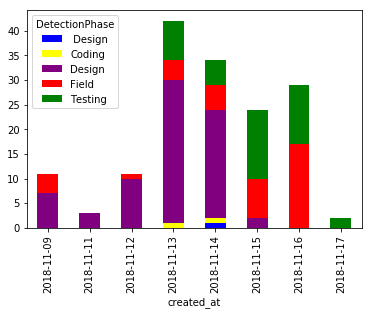

In [57]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

In [60]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

In [61]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

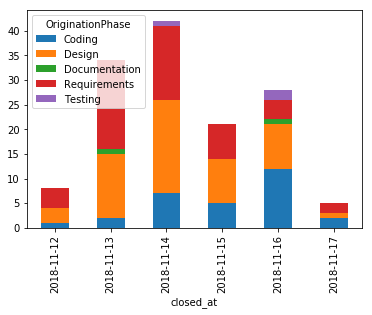

In [62]:
# Requirement 1: Issues closed every day for every Origination Phase.
LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True, grid=False)

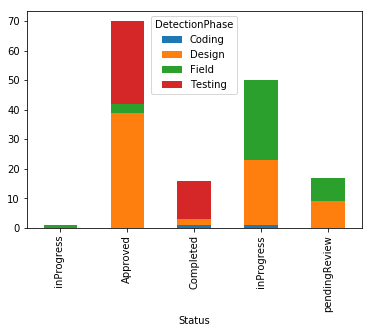

In [63]:
#Requirement 2: Issues created for every Phase based on their Status (DetectionPhase)
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True, grid=False)

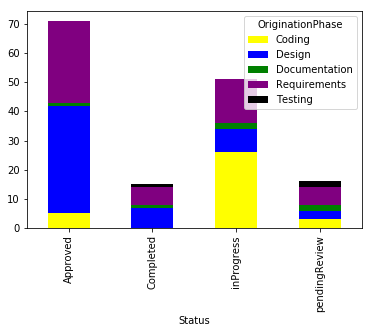

In [64]:
#Requirement 2: Issues created for every Phase based on their Status (OriginationPhase)
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['yellow','blue', 'green', 'purple', 'black'], grid=False)